## SRPT vs. BASRPT

In [4]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf50_1s_university_testbed_data_v4.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [5]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.1_repeat_0_scheduler_basrpt'
Measurement duration: 6670065.544839623 (Start time : 833758.1931049529 | End time: 7503823.737944576)
Total number of generated demands (jobs or flows) passed to env: 3000
Total number of these demands which arrived during measurement period: 2394
Total info arrived: 7828347.0 info unit demands arrived
Total info transported: 7828347.0 info unit demands transported
Load (abs): 1.1736536841165668 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.09780447367638057 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 1.1736536841165668 info units transported per unit time
Throughput (frac): 1.0 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 3000
Total



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.3_repeat_0_scheduler_basrpt'
Measurement duration: 4520812.64782319 (Start time : 565101.5809778989 | End time: 5085914.228801089)
Total number of generated demands (jobs or flows) passed to env: 6000
Total number of these demands which arrived during measurement period: 4772
Total info arrived: 16025997.0 info unit demands arrived
Total info transported: 14058039.0 info unit demands transported
Load (abs): 3.544937215594779 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.29541143463289826 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 3.1096265417610405 info units transported per unit time
Throughput (frac): 0.8772021484841162 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_de

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total number of these demands which arrived during measurement period: 9587
Total info arrived: 32310619.0 info unit demands arrived
Total info transported: 10717094.0 info unit demands transported
Load (abs): 8.3238515843984 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.6936542986998666 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 2.760934412059595 info units transported per unit time
Throughput (frac): 0.3316895290678275 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 12000
Total number of these flows which arrived during measurement period: 9587
Time first flow arrived: 487065.89627391374
Time last flow arrived: 4366312.431534437
Total number of flows that were completed: 2933
Total number of flows that were dropped: 6654
Fraction of arrived flows dropped: 0.6940648795243559
To

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

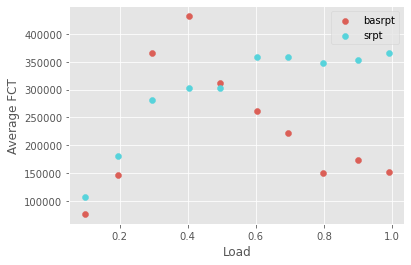

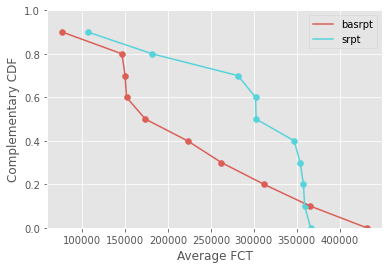

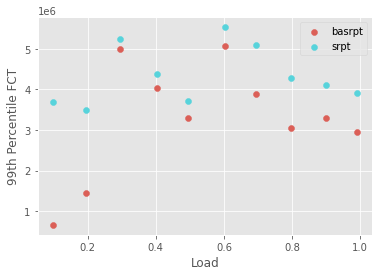

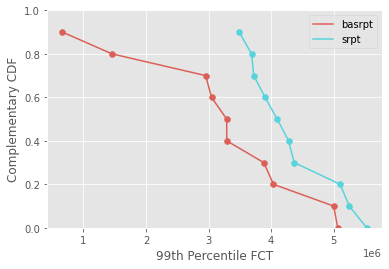

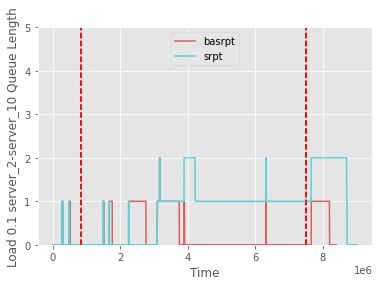

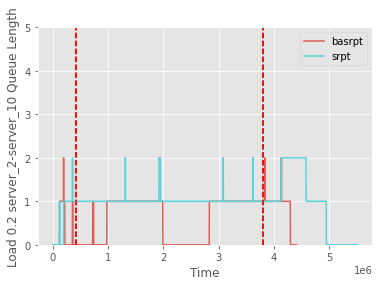

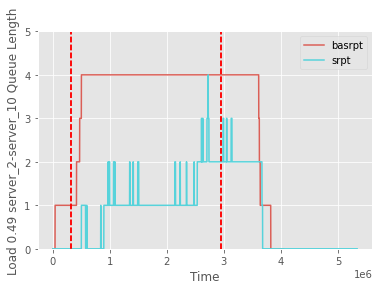

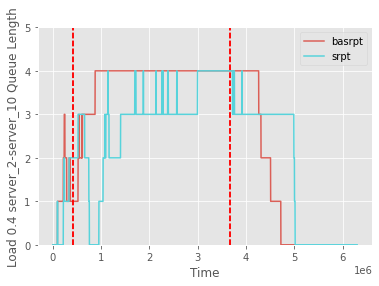

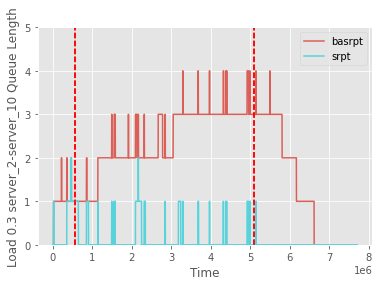

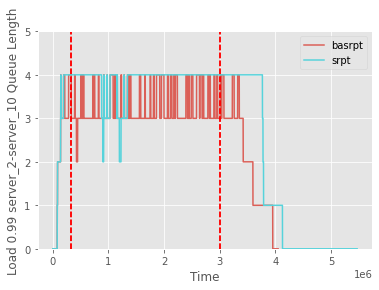

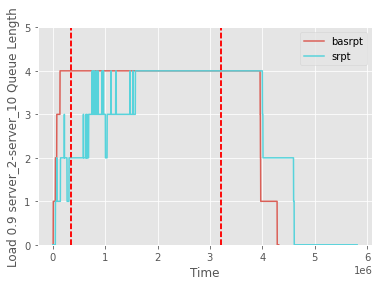

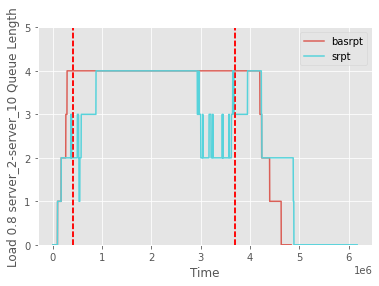

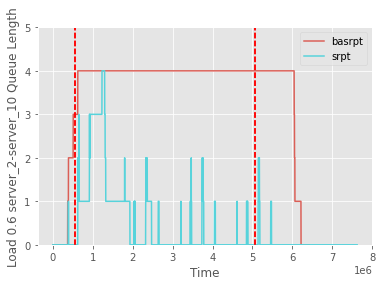

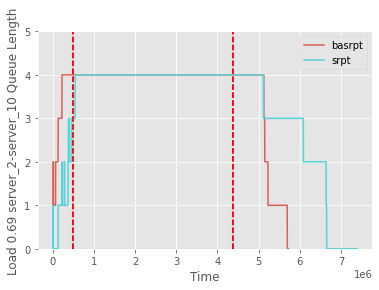

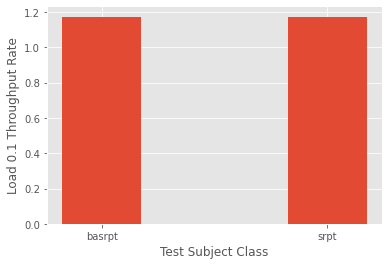

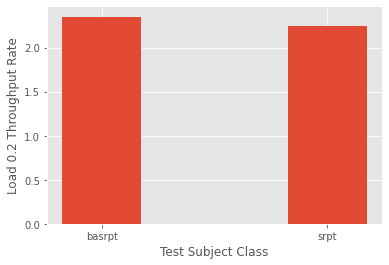

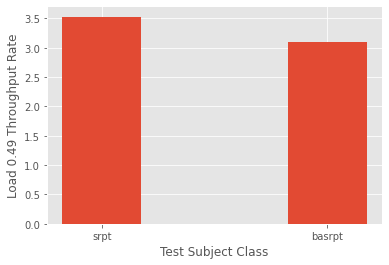

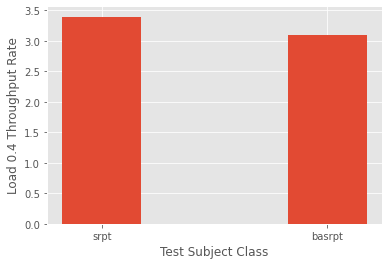

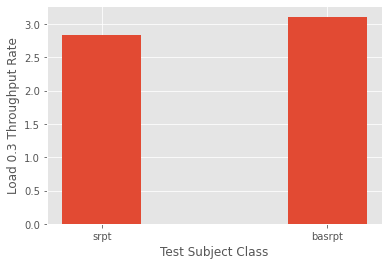

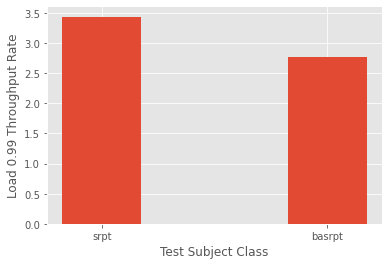

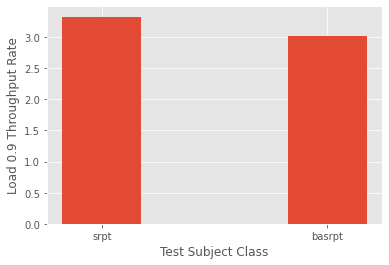

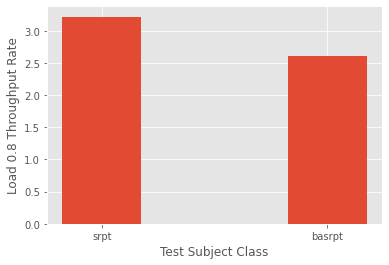

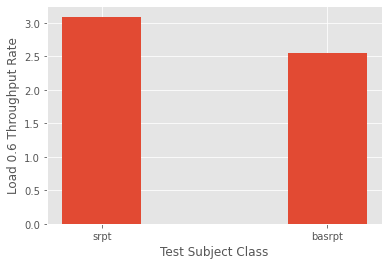

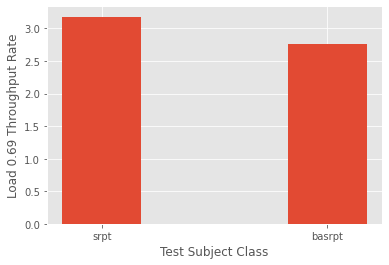

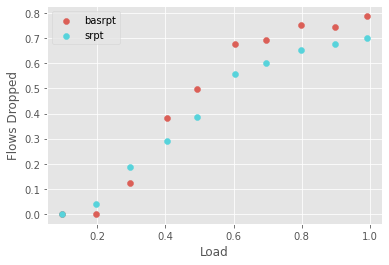

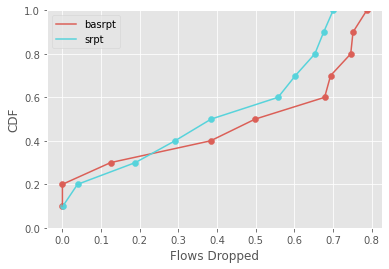

In [13]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvPlotter, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)
# plot
plotter = EnvsPlotter()
_ = plotter.plot_average_fct_vs_load(*analysers)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers)
_ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
_ = plotter.plot_throughput_vs_test_subject_for_different_loads(*analysers)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers)